## Zeros in expenditure data



### Introduction



Consider the following data from Uganda, collected at the household
level.  The data itself is *recall* data; the respondent is asked to
recall the value, the quantity, and the price of consumption out of
expenditures over the past week, for a rather long list of possible
non-durable expenditure items.  I&rsquo;ve organized the data as an array,
with each row corresponding to a household, and each column
corresponding to a different consumption item.



In [1]:
import pandas as pd

x = pd.read_pickle('uganda_expenditures.pickle')

x.head()

Matoke  Sweet potato  Cassava  Irish potato    Rice  \
j          t    mkt                                                         
1013000201 2005 1     8000.0           NaN      NaN           NaN     NaN   
           2009 1    18000.0        3000.0   6000.0           NaN  6250.0   
           2010 1    15000.0           NaN      NaN           NaN  7000.0   
           2011 1    16000.0        1000.0      NaN           NaN     NaN   
1013000202 2005 1        NaN           NaN      NaN           NaN     NaN   

                      Maize  Millet  Sorghum    Beef    Pork  ...   Salt  \
j          t    mkt                                           ...          
1013000201 2005 1    3200.0     NaN      NaN  6000.0     NaN  ...   75.0   
           2009 1    1200.0     NaN      NaN     NaN     NaN  ...  500.0   
           2010 1     800.0     NaN      NaN  6000.0  5000.0  ...  250.0   
           2011 1       NaN     NaN      NaN     NaN     NaN  ...  250.0   
1013000202 2005 1       NaN     NaN      NaN     NaN     NaN  ...    NaN   

                       Soda     Beer  Other Alcohol  Restaurant  Ground nuts  \
j          t    mkt                                                            
1013000201 2005 1       NaN   2400.0            NaN         NaN          NaN   
           2009 1       NaN      NaN          500.0         NaN          NaN   
           2010 1    3000.0  15000.0         2000.0      6000.0          NaN   
           2011 1    4000.0  15000.0            NaN         NaN          NaN   
1013000202 2005 1       NaN      NaN            NaN     10500.0          NaN   

                     Chapati  Cassava (flour)  Loaf  Bun  
j          t    mkt                                       
1013000201 2005 1        NaN              NaN   NaN  NaN  
           2009 1        NaN              NaN   NaN  NaN  
           2010 1        NaN              NaN   NaN  NaN  
           2011 1        NaN              NaN   NaN  NaN  
1013000202 2005 1        NaN              NaN   NaN  NaN  

[5 rows x 44 columns]

One thing to note about these data is the large number of &ldquo;zeros&rdquo;.
  This may reflect the fact that few households consume all different
  kinds of consumption goods every week, or could reflect &ldquo;missing&rdquo;
  data on non-zero expenditures (e.g., if the respondent forgot).



In [2]:
# Count of non-missing observations by year (t) and market (mkt)
x.groupby(['t','mkt']).count().T

t,2005,2009,2010,2011,2013,2015
mkt,1,1,1,1,1,1
Matoke,1404,1375,1242,1312,1691,1691
Sweet potato,1571,1689,359,1499,1503,1503
Cassava,1682,1798,1109,1728,1781,1781
Irish potato,354,346,257,331,590,590
Rice,851,772,685,672,1063,1063
Maize,2017,1845,1515,1750,2062,2062
Millet,557,442,479,477,637,637
Sorghum,408,458,385,405,376,376
Beef,1027,949,915,945,1214,1214


Missing data can cause serious problems in a demand analysis,
   depending on how and why data might be missing.  If observations
   are &ldquo;missing at random&rdquo; (MAR) then it may be an easy issue to
   address, but if the probability of being missing is related to the
   disturbance term in the demand equation this becomes a sort of
   selection problem that will complicate estimation and inference.



### Household characteristics



One class of variables that may help to explain zeros are
   &ldquo;household characteristics&rdquo;; this includes household size and
   composition (both because this affects demand and perhaps because
   there are more potential shoppers); whether a household is urban or
   rural, and perhaps other characteristics.

Here are some characteristics for the households in Uganda:



In [3]:
z = pd.read_pickle('uganda_hh_characteristics.pickle')
z

Rural  log HSize  Males 0-1  Males 1-5  Males 5-10  \
j            t    mkt                                                       
1013000201   2005 1      1.0   0.000000        0.0        0.0         0.0   
             2009 1      1.0   1.386294        0.0        0.0         1.0   
             2010 1      1.0   1.791759        0.0        0.0         1.0   
             2011 1      1.0   1.945910        0.0        0.0         1.0   
1013000202   2005 1      1.0   0.693147        0.0        1.0         0.0   
...                      ...        ...        ...        ...         ...   
H43008-04-01 2015 1      1.0   1.791759        0.0        0.0         0.0   
H43009-04-01 2013 1      1.0   2.397895        0.0        1.0         0.0   
             2015 1      1.0   2.397895        0.0        1.0         0.0   
H43010-04-01 2013 1      1.0   1.945910        0.0        1.0         2.0   
             2015 1      1.0   1.945910        0.0        1.0         2.0   

                       Males 10-15  Males 15-20  Males 20-30  Males 30-50  \
j            t    mkt                                                       
1013000201   2005 1            0.0          0.0          0.0          0.0   
             2009 1            0.0          1.0          0.0          0.0   
             2010 1            2.0          1.0          0.0          0.0   
             2011 1            2.0          1.0          0.0          0.0   
1013000202   2005 1            0.0          0.0          0.0          0.0   
...                            ...          ...          ...          ...   
H43008-04-01 2015 1            0.0          0.0          1.0          0.0   
H43009-04-01 2013 1            1.0          2.0          1.0          0.0   
             2015 1            1.0          2.0          1.0          0.0   
H43010-04-01 2013 1            0.0          1.0          0.0          1.0   
             2015 1            0.0          1.0          0.0          1.0   

                       Males 50-60  Males 60-100  Females 0-1  Females 1-5  \
j            t    mkt                                                        
1013000201   2005 1            0.0           0.0          0.0          0.0   
             2009 1            0.0           0.0          0.0          0.0   
             2010 1            0.0           0.0          0.0          0.0   
             2011 1            0.0           0.0          0.0          0.0   
1013000202   2005 1            0.0           0.0          0.0          0.0   
...                            ...           ...          ...          ...   
H43008-04-01 2015 1            0.0           0.0          1.0          1.0   
H43009-04-01 2013 1            1.0           0.0          1.0          0.0   
             2015 1            1.0           0.0          1.0          0.0   
H43010-04-01 2013 1            0.0           0.0          0.0          0.0   
             2015 1            0.0           0.0          0.0          0.0   

                       Females 5-10  Females 10-15  Females 15-20  \
j            t    mkt                                               
1013000201   2005 1             0.0            0.0            0.0   
             2009 1             0.0            0.0            0.0   
             2010 1             0.0            0.0            0.0   
             2011 1             0.0            0.0            1.0   
1013000202   2005 1             0.0            0.0            0.0   
...                             ...            ...            ...   
H43008-04-01 2015 1             2.0            0.0            0.0   
H43009-04-01 2013 1             1.0            0.0            0.0   
             2015 1             1.0            0.0            0.0   
H43010-04-01 2013 1             0.0            1.0            0.0   
             2015 1             0.0            1.0            0.0   

                       Females 20-30  Females 30-50  Females 50-60  \
j            t    mkt               

### Data mining



Unfortunately, demand theory doesn&rsquo;t offer much guidance to let us
   know how household characteristics should be related to the
   probability of a goods&rsquo; consumption being positive in a given week;
   this is a case where a certain amount of &ldquo;data mining&rdquo; may be a
   reasonable approach.

We&rsquo;ll use tools we&rsquo;ve discussed in class, relying on an
implementation given by the `scikit.learn` project.  In the first
instance, let&rsquo;s consider simply estimating a logit, where the
dependent variable is simply a dummy indicating that the
expenditure of a given good $i$ for a household $j$ at time $t$ is
positive, and where the right-hand-side variables are all the
household characteristics in `z`, combined with a collection of
time dummies (which we can think of as picking up the influence of
prices, among other things):



In [4]:
from sklearn.linear_model import LogisticRegression

time_effects = pd.get_dummies(z.reset_index()[['t']].set_index(z.index),columns=['t'])

X = pd.concat([z,time_effects],axis=1).dropna(how='any') # Drop missing data
x = x.dropna(how='all',axis=1)

# Here's a good place to limit the number of dependent variables
# if we want to save time.  We select just the first few columns:
x = x.iloc[:,:5]

Ests = {}
for item in x: # Iterate over dummies indicating positive expenditure
    y = (x>0)[item]  # Dummy for non-missing item expenditures
    Ests[item] = LogisticRegression(fit_intercept=False,penalty='none').fit(X,y)

#### Coefficients



This gives us a vector of coefficients for each good, which we can
re-arrange into a pandas DataFrame.  Recall that in the logit model
$e^{X\beta}$ is interpreted as the *odds*.  Thus, for a variable in
$X$ which is itself a logarithm, like log HSize, the associated
coefficient can be interpreted as an elasticity.  Accordingly, if the
coefficient on log HSize in the regression involving Matoke is 0.6,
then we can say that for every one percent increase in household size
(other things equal) there&rsquo;s roughly a 0.6% increase in the odds of
observing positive Matoke consumption.  

Coefficients associated with variables in levels have the
interpetation of *semi-elasticities*; thus, the odds of a rural
household consuming Matoke are approximately 53% less than that for
the average household in the sample.  What is the interpretation of
the coefficients associated with discrete counts of different
household members?



In [5]:
Coefs = pd.DataFrame({i:Ests[i].coef_.squeeze() for i in Ests.keys()},index=X.columns)
Coefs

,Matoke,Sweet potato,Cassava,Irish potato,Rice
Rural,-0.525357,0.108331,0.613576,-0.909895,-1.507732
log HSize,0.599675,0.636497,0.743605,0.621801,0.628865
Males 0-1,-0.212693,-0.148292,-0.027428,-0.070168,-0.142519
Males 1-5,-0.167610,0.029948,-0.033883,-0.146897,-0.066324
Males 5-10,-0.152444,-0.050122,-0.053215,-0.187946,-0.181614
Males 10-15,-0.168070,-0.061220,-0.070626,-0.262936,-0.141085
Males 15-20,-0.058131,-0.073955,-0.058001,-0.095994,-0.149645
Males 20-30,-0.058028,-0.089054,-0.117155,-0.032370,0.051340
Males 30-50,0.157820,-0.039731,-0.052548,-0.089671,0.008630
Males 50-60,0.012438,0.013516,-0.020186,-0.233906,-0.308151


#### Cross-Validation & Lasso



Interpreting the coefficients above allows us to think about how
differences in household characteristics affect the odds of consuming
a particular good, but our original concern was that the data might
not be *missing at random*, which could complicate subsequent
estimation of a demand system.  

Here we use Lasso & cross-validation to tune the Lasso penalty
parameter to check which (if any) of our regressors is useful for
out-of-sample prediction.  

We again use a canned routine from sklearn, `LogisticRegressionCV`.
This bundles both the Lasso penalty criterion and cross-validation
together for us, and searches over a list of penalty parameters to
minimize the EMSE, computed via $K$-fold cross-validation.



In [6]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

Lambdas = np.logspace(-5,5,11)

CVEsts = {}
for item in x: # Iterate over dummies indicating positive expenditure
    print(item)
    y = (x>0)[item]  # Dummy for non-missing item expenditures

    # Use 5-fold cross-validation in computing CV statistics; using
    # penalty 'l1' implies a lasso estimator.
    CVEsts[item] = LogisticRegressionCV(fit_intercept=False,
                                        Cs = 1/Lambdas,        # Penalty 1/lambdas to search over
                                        cv=5,                 # K folds
                                        penalty='l1',         # Lasso penalty
                                        solver='liblinear',
                                        scoring='neg_mean_squared_error', # (minus) our CV statistic
                                        n_jobs=-1             # Number of cores to use (-1=all)
                                       ).fit(X,y)

CVCoefs = pd.DataFrame({i:CVEsts[i].coef_.squeeze() for i in CVEsts.keys()},index=X.columns)
CVCoefs

Matoke
Sweet potato
Cassava
Irish potato
Rice


,Matoke,Sweet potato,Cassava,Irish potato,Rice
Rural,-0.486740,0.038802,0.546866,-0.520263,-1.531861
log HSize,0.134368,0.428015,0.534832,-0.650235,0.367567
Males 0-1,0.000000,-0.077486,0.000000,0.000000,-0.042733
Males 1-5,-0.007039,0.054817,0.000000,0.000000,-0.005095
Males 5-10,-0.009864,-0.004904,-0.009585,0.000000,-0.129177
Males 10-15,-0.010530,-0.017546,-0.031675,0.000000,-0.090847
Males 15-20,0.000000,-0.032582,-0.021948,0.000000,-0.102787
Males 20-30,0.000000,-0.066942,-0.093264,0.000000,0.068558
Males 30-50,0.049045,-0.031108,-0.036476,0.000000,0.022886
Males 50-60,0.000000,0.000241,0.000000,0.000000,-0.234888


We can see how the estimated coefficients vary with different choices
of the penalty parameter $\lambda$ ($=1/C$).  Consider just the
coefficients associated with estimation of the Matoke logit: If we try
$P$ different values of the penalty parameter using $K$-fold
cross-validation this will be $KP$ different estimates for every
parameter.  We can average over the $K$ different folds to get a
clearer picture of how coefficients vary with &lambda;



In [7]:
pd.DataFrame(CVEsts['Matoke'].coefs_paths_[True].mean(axis=0),index=Lambdas.tolist(),columns=X.columns).T

,0.00001,0.00010,0.00100,0.01000,0.10000,1.00000,10.00000,100.00000,1000.00000,10000.00000,100000.00000
Rural,-0.524803,-0.524805,-0.524806,-0.524849,-0.525280,-0.529591,-0.558826,-0.454227,0.0,0.0,0.0
log HSize,0.593505,0.593557,0.593652,0.593285,0.591456,0.572143,0.418421,0.117803,0.0,0.0,0.0
Males 0-1,-0.211701,-0.211709,-0.211730,-0.211617,-0.210904,-0.203556,-0.136975,0.000000,0.0,0.0,0.0
Males 1-5,-0.165731,-0.165743,-0.165761,-0.165683,-0.165269,-0.160914,-0.124922,-0.000219,0.0,0.0,0.0
Males 5-10,-0.150757,-0.150767,-0.150785,-0.150709,-0.150322,-0.146222,-0.112363,-0.004178,0.0,0.0,0.0
Males 10-15,-0.168193,-0.168207,-0.168222,-0.168147,-0.167737,-0.163436,-0.126729,-0.002940,0.0,0.0,0.0
Males 15-20,-0.057658,-0.057663,-0.057680,-0.057612,-0.057218,-0.053109,-0.022850,0.003914,0.0,0.0,0.0
Males 20-30,-0.056299,-0.056309,-0.056324,-0.056278,-0.056101,-0.054180,-0.036427,0.000000,0.0,0.0,0.0
Males 30-50,0.160486,0.160479,0.160453,0.160474,0.160317,0.158925,0.144007,0.040188,0.0,0.0,0.0
Males 50-60,0.013711,0.013706,0.013685,0.013724,0.013800,0.014715,0.011733,0.000000,0.0,0.0,0.0


and see also how the EMSE varies with $\lambda$



In [8]:
EMSEs={k:-e.scores_[True].mean(axis=0).ravel() for k,e in CVEsts.items()} 

EMSEs = pd.DataFrame(EMSEs,index=np.log(Lambdas).tolist()).T
EMSEs

,-11.512925,-9.210340,-6.907755,-4.605170,-2.302585,0.000000,2.302585,4.605170,6.907755,9.210340,11.512925
Matoke,1.770977,1.770977,1.770977,1.770977,1.770525,1.772784,1.773235,1.763072,1.968379,1.968379,1.968379
Sweet potato,1.601129,1.601355,1.601129,1.601129,1.600903,1.597741,1.589836,1.633427,1.834896,1.834896,1.834896
Cassava,1.553247,1.553247,1.553247,1.553247,1.553021,1.550536,1.545793,1.609938,1.654658,2.231282,2.231282
Irish potato,0.563975,0.563975,0.563975,0.563975,0.563975,0.563975,0.561039,0.558554,0.557425,0.557425,0.557425
Rice,1.010503,1.010503,1.010503,1.010503,1.010503,1.009147,1.008470,1.047092,1.153247,1.153247,1.153247


Plotting these versus $\log\lambda$:



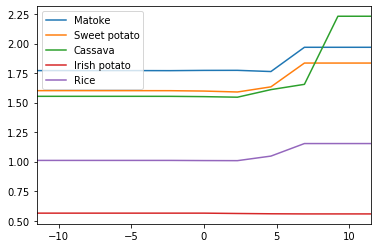

In [9]:
EMSEs.T.plot()

Finding the minima of these curves gives estimates of the optimal
&lambda;:



In [10]:
lambda_star = pd.Series({k:1/e.C_[0] for k,e in CVEsts.items()})
lambda_star

Matoke           100.0
Sweet potato      10.0
Cassava           10.0
Irish potato    1000.0
Rice              10.0
dtype: float64

Large values of &lambda; encourage parsimony in the selection of
regressors, so it&rsquo;s not surprising to find that consumption items with
large values of $\lambda^*$  also have few regressors (this is the
magic of Lasso):



In [11]:
Lasso_outcomes = pd.DataFrame({'#Regressors':(np.abs(CVCoefs)>1e-5).sum(),
                               'λ*':lambda_star})
Lasso_outcomes

,#Regressors,λ*
Matoke,11,100.0
Sweet potato,26,10.0
Cassava,23,10.0
Irish potato,2,1000.0
Rice,24,10.0
